Determine the «survival» rates independently for men and women for all age groups (“0-4” -> “5-9” -> “10-14” ...) according to 2000-2005 years (data for Russia or any other country)
Determine the fertility rate for women in the age category “20- ... -39”
Calculate boys/girls ratio for newborn children
Predict the change in the country's population and demographic profile for 100 years and compare with existing prediction!

For that:
Write out equations for modeling
Define input/output data and parameters


AUSTRALIA/NEW-ZEALAND POPULATION

In [3]:
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os
import warnings

Dataset Preprocesing

In [4]:
# Reading whole dataset from file and loading the data into a DataFrame
file_path = 'age_data.xls'
try:
    df_sheet_names = pd.ExcelFile(file_path).sheet_names
except FileNotFoundError:
    print(f"No file found at {file_path}")
    # Handle the error or exit
    exit()

# Function to filter a dataset for Nigeria
def filtered_dataset(dataset):
    # Check if the country code exists in the dataset
    if 927 not in dataset['Country code'].values:
        print("Country code 927 not found in dataset")
        # Handle the error or return
        return dataset
    return dataset[dataset['Country code'] == 927]\
            .drop(columns = ['Country code'])\
            .set_index('Year')

# Try to read raw data from excel and assign to variables
try:
    both_1950_2005_estimates = pd.read_excel(file_path, header = 0, sheet_name=df_sheet_names[0])
    both_2010_2050_medium_fertility = pd.read_excel(file_path, header = 0, sheet_name=df_sheet_names[1])
    male_1950_2005_estimates = pd.read_excel(file_path, header = 0, sheet_name=df_sheet_names[3])
    male_2010_2050_medium_fertility = pd.read_excel(file_path, header = 0, sheet_name=df_sheet_names[4])
    female_1950_2005_estimates = pd.read_excel(file_path, header = 0, sheet_name=df_sheet_names[6])
    female_2010_2050_medium_fertility = pd.read_excel(file_path, header = 0, sheet_name=df_sheet_names[7])
except KeyError as e:
    print(f"Sheet name {e} not found in Excel file")
    # Handle the error or exit
    exit()

# Update datasets to filter data for Nigeria
both_1950_2005_estimates = filtered_dataset(both_1950_2005_estimates)
both_2010_2050_medium_fertility = filtered_dataset(both_2010_2050_medium_fertility)
male_1950_2005_estimates = filtered_dataset(male_1950_2005_estimates)
male_2010_2050_medium_fertility = filtered_dataset(male_2010_2050_medium_fertility)
female_1950_2005_estimates = filtered_dataset(female_1950_2005_estimates)
female_2010_2050_medium_fertility = filtered_dataset(female_2010_2050_medium_fertility)

In [320]:
both_2010_2050_medium_fertility

,0 - 4,5 - 9,10 - 14,15 - 19,20 - 24,25 - 29,30 - 34,35 - 39,40 - 44,45 - 49,...,55 - 59,60 - 64,65 - 69,70 - 74,75 - 79,80 - 84,85 - 89,90 - 94,95 - 99,100+
Year,,,,,,,,,,,,,,,,,,,,,
2010,23536.254,20633.118,18395.553,16597.754,14347.946,11846.544,9038.291,6934.571,5577.907,4696.548,...,3342.206,2503.389,1939.419,1318.804,770.248,357.493,117.686,24.590,2.779,0.179
2015,24428.869,21998.541,20021.189,18011.296,16126.140,13638.176,10978.002,8258.943,6333.158,5118.582,...,3647.454,2967.799,2114.100,1500.455,888.825,415.272,139.253,29.897,3.701,0.233
2020,24673.591,23058.194,21424.168,19638.222,17541.559,15401.009,12714.093,10097.222,7589.279,5841.821,...,3940.975,3257.035,2525.066,1653.889,1025.672,488.853,165.907,36.399,4.625,0.317
2025,24509.168,23495.548,22555.217,21057.531,19168.382,16822.522,14455.475,11782.313,9341.973,7042.013,...,4336.778,3540.486,2791.960,1996.838,1148.702,575.657,200.394,44.662,5.796,0.407
2030,24367.633,23513.987,23067.754,22213.710,20599.241,18452.632,15884.319,13499.509,10985.188,8728.031,...,5003.669,3921.136,3059.206,2231.112,1407.797,657.988,242.085,55.542,7.321,0.523
2035,24347.619,23520.879,23155.074,22758.671,21775.610,19906.818,17526.325,14936.451,12674.316,10328.996,...,6101.757,4552.908,3414.381,2470.606,1594.922,822.199,283.630,68.977,9.359,0.674
2040,24300.004,23626.174,23219.651,22880.340,22351.527,21123.530,19019.131,16596.429,14119.466,11991.209,...,7648.023,5585.194,3994.976,2785.644,1790.783,948.744,362.703,82.983,11.925,0.880
2045,24050.173,23691.277,23372.684,22976.137,22511.317,21757.451,20297.952,18133.854,15794.514,13439.022,...,9148.228,7041.895,4934.898,3292.341,2046.259,1083.957,427.780,108.755,14.703,1.142
2050,23574.447,23545.714,23479.061,23156.310,22644.040,21986.103,21021.099,19481.162,17369.229,15120.213,...,10729.652,8468.845,6265.069,4103.008,2448.580,1258.645,498.713,131.186,19.693,1.436


In [321]:
both_1950_2005_estimates

,0 - 4,5 - 9,10 - 14,15 - 19,20 - 24,25 - 29,30 - 34,35 - 39,40 - 44,45 - 49,...,55 - 59,60 - 64,65 - 69,70 - 74,75 - 79,80 - 84,85 - 89,90 - 94,95 - 99,100+
Year,,,,,,,,,,,,,,,,,,,,,
1950,5476.400,4397.150,3796.060,3295.530,2865.020,2487.200,2132.720,1780.730,1512.020,1280.870,...,929.330,695.710,478.200,291.570,145.480,64.321,-,-,-,-
1955,6559.498,4754.909,4194.862,3661.738,3159.712,2724.308,2352.728,2002.973,1656.819,1392.329,...,1006.190,782.447,542.635,328.302,164.969,74.194,-,-,-,-
1960,7357.623,5747.280,4548.898,4054.385,3518.213,3012.049,2584.238,2216.730,1870.450,1531.905,...,1030.968,853.585,616.629,378.263,189.975,86.622,-,-,-,-
1965,8265.085,6505.304,5513.648,4405.160,3903.564,3362.051,2865.086,2442.711,2077.706,1736.467,...,1132.129,881.370,679.717,436.450,223.809,102.843,-,-,-,-
1970,9345.081,7372.673,6256.337,5346.122,4243.926,3732.656,3200.579,2712.765,2296.034,1935.509,...,1258.030,975.244,709.365,488.647,264.149,124.539,-,-,-,-
1975,10707.805,8413.879,7111.894,6079.904,5164.039,4070.445,3565.468,3041.835,2560.281,2148.486,...,1440.130,1092.219,793.349,518.050,302.477,152.055,-,-,-,-
1980,12519.216,9779.885,8191.717,7010.980,6022.645,5117.223,4037.988,3492.510,2927.756,2437.651,...,1632.952,1262.515,899.011,588.169,327.368,182.639,-,-,-,-
1985,14819.258,11403.398,9442.258,7928.146,6699.557,5695.283,4814.619,3793.661,3283.937,2736.233,...,1830.837,1434.358,1044.219,671.445,375.074,210.551,-,-,-,-
1990,16900.950,13618.560,11070.038,9214.166,7681.095,6440.670,5455.668,4595.850,3602.269,3096.619,...,2057.544,1616.561,1193.830,785.918,432.673,244.535,-,-,-,-


TASK 1

Determine the «survival» rates independently for men and women for all age groups (“0-4” -> “5-9” -> “10-14” ...) according to 2000-2005 years (data for Russia or any other country)


In [288]:
# def get_survival_rate(dataset, start_year, end_year):
#     """
#     Calculates the survival rate for each age group over a specified period.

#     The survival rate is calculated as the ratio of the population at the end of the period to 
#     the population at the start of the period for each age group, with the start_year population 
#     shifted one age group. 

#     Note: The '0 - 4' age group is dropped because this group does not have a preceding age 
#     group from which to calculate a survival rate.

#     Args:
#     dataset (pd.DataFrame): The dataset to calculate survival rates from.
#     start_year (int): The start year of the period.
#     end_year (int): The end year of the period.

#     Returns:
#     pd.DataFrame: A DataFrame with survival rates for each age group.
#     """
#     return pd.DataFrame(dataset.loc[end_year] / dataset.loc[start_year].shift(periods = 1), columns = [end_year]).drop('0 - 4').T


In [5]:
def get_survival_rate(dataset, start_year, end_year):
    start_pop = dataset.loc[start_year]
    end_pop = dataset.loc[end_year]

    # Replace non-numeric values with NaN
    start_pop = pd.to_numeric(start_pop, errors='coerce')
    end_pop = pd.to_numeric(end_pop, errors='coerce')

    # Shift the start population down by one
    start_pop_shifted = start_pop.shift(periods = 1)

    # Calculate the survival rate, handling possible division by zero
    survival_rate = np.where(start_pop_shifted != 0, end_pop / start_pop_shifted, np.nan)

    # Convert numpy array to pandas Series
    survival_rate_series = pd.Series(survival_rate, index=start_pop.index)

    survival_rate_df = survival_rate_series.to_frame(end_year)

    # Drop '0 - 4' row if it exists
    if '0 - 4' in survival_rate_df.index:
        survival_rate_df = survival_rate_df.drop('0 - 4')

    return survival_rate_df.T


In [353]:
get_survival_rate(male_1950_2005_estimates, 1995, 2000)

,5 - 9,10 - 14,15 - 19,20 - 24,25 - 29,30 - 34,35 - 39,40 - 44,45 - 49,50 - 54,55 - 59,60 - 64,65 - 69,70 - 74,75 - 79,80 - 84,85 - 89,90 - 94,95 - 99,100+
2000,1.056137,1.039858,1.012921,0.965453,0.978536,1.028951,1.029403,1.011787,1.005166,1.000313,0.9843,0.95857,0.929904,0.889823,0.826119,0.715716,0.555416,0.380615,0.263717,0.199839


In [354]:
get_survival_rate(male_1950_2005_estimates, 2000, 2005)

,5 - 9,10 - 14,15 - 19,20 - 24,25 - 29,30 - 34,35 - 39,40 - 44,45 - 49,50 - 54,55 - 59,60 - 64,65 - 69,70 - 74,75 - 79,80 - 84,85 - 89,90 - 94,95 - 99,100+
2005,1.016097,1.010998,1.023469,1.047875,1.059838,1.04832,1.032224,1.018708,1.008314,0.998256,0.984983,0.966617,0.93744,0.891362,0.820329,0.718454,0.578153,0.412859,0.286443,0.206897


In [355]:
get_survival_rate(male_1950_2005_estimates, 1990, 1995)

,5 - 9,10 - 14,15 - 19,20 - 24,25 - 29,30 - 34,35 - 39,40 - 44,45 - 49,50 - 54,55 - 59,60 - 64,65 - 69,70 - 74,75 - 79,80 - 84,85 - 89,90 - 94,95 - 99,100+
1995,1.062064,1.055311,1.050482,0.95533,1.000261,1.007877,1.01598,1.024017,0.978391,0.987651,0.969997,0.954672,0.896293,0.832291,0.773008,0.617803,0.317145,NaN,NaN,NaN


In [356]:
get_survival_rate(male_1950_2005_estimates, 1985, 1990)

,5 - 9,10 - 14,15 - 19,20 - 24,25 - 29,30 - 34,35 - 39,40 - 44,45 - 49,50 - 54,55 - 59,60 - 64,65 - 69,70 - 74,75 - 79,80 - 84,85 - 89,90 - 94,95 - 99,100+
1990,1.014871,1.042,1.055889,0.985512,1.023406,1.043447,1.032809,1.059169,1.003411,0.991417,0.965082,0.949828,0.92322,0.832147,0.772628,0.977902,NaN,NaN,NaN,NaN


In [6]:
def min_max_survival_rate_by_age_group(dataset, start_year, end_year, step=5):
    # Initialize the min and max survival rates as empty dictionaries
    min_survival_rates = {}
    max_survival_rates = {}

    for year in range(start_year, end_year, step):
        survival_rate_df = get_survival_rate(dataset, year, year + step)
        survival_rate_df = survival_rate_df.reset_index(drop=True)  # Reset the index

        for col in survival_rate_df.columns:
            # Update the min and max survival rates for each age group
            min_survival_rates[col] = min(min_survival_rates.get(col, float('inf')), survival_rate_df[col].min())
            max_survival_rates[col] = max(max_survival_rates.get(col, float('-inf')), survival_rate_df[col].max())

    # Convert the dictionaries back to pandas Series for easier viewing and manipulation
    min_survival_rates = pd.Series(min_survival_rates)
    max_survival_rates = pd.Series(max_survival_rates)

    return min_survival_rates, max_survival_rates

# Call the function
min_survival_rate, max_survival_rate = min_max_survival_rate_by_age_group(male_1950_2005_estimates, 1950, 2005)

# Print results
print("Min survival rates for each age group: \n", min_survival_rate)
print("\nMax survival rates for each age group: \n", max_survival_rate)


Min survival rates for each age group: 
 5 - 9      0.995665
10 - 14    1.010998
15 - 19    1.000360
20 - 24    0.955330
25 - 29    0.978536
30 - 34    1.007877
35 - 39    1.013228
40 - 44    1.011412
45 - 49    0.978391
50 - 54    0.957093
55 - 59    0.938359
60 - 64    0.887035
65 - 69    0.838299
70 - 74    0.747494
75 - 79    0.658797
80 - 84    0.617803
85 - 89    0.317145
90 - 94    0.380615
95 - 99    0.263717
100+       0.199839
dtype: float64

Max survival rates for each age group: 
 5 - 9      1.062064
10 - 14    1.055311
15 - 19    1.055889
20 - 24    1.084572
25 - 29    1.114911
30 - 34    1.079730
35 - 39    1.052005
40 - 44    1.059169
45 - 49    1.013456
50 - 54    1.000313
55 - 59    0.984983
60 - 64    0.966617
65 - 69    0.937440
70 - 74    0.891362
75 - 79    0.826119
80 - 84    0.977902
85 - 89    0.578153
90 - 94    0.412859
95 - 99    0.286443
100+       0.206897
dtype: float64


In [358]:
def plot_survival_rates(dataset, years, gender='men'):

    # Set up the seaborn style
    sns.set_style("whitegrid")
    sns.set_palette("husl")

    # Create a new figure with specified size
    plt.figure(figsize=(20,7))

    # For each start year in the given list...
    for year in years:
        # ...calculate the survival rate for the 5-year period starting from that year
        survival_rate = get_survival_rate(dataset, year, year + 5)

        # Plot the survival rate as a line on the figure
        plt.plot(survival_rate.T, label=f'{year}-{year+5}', linestyle='-', marker='o', markersize=8)

    # Set the title of the figure (includes the gender)
    plt.title(f'Survival rate for {gender}')
    
    # Set the label for the x-axis
    plt.xlabel('Age group')

    # Set the label for the y-axis
    plt.ylabel('Survival rate')

    # Display the legend (shows which line corresponds to which year)
    plt.legend()

    # Show the figure
    plt.show()


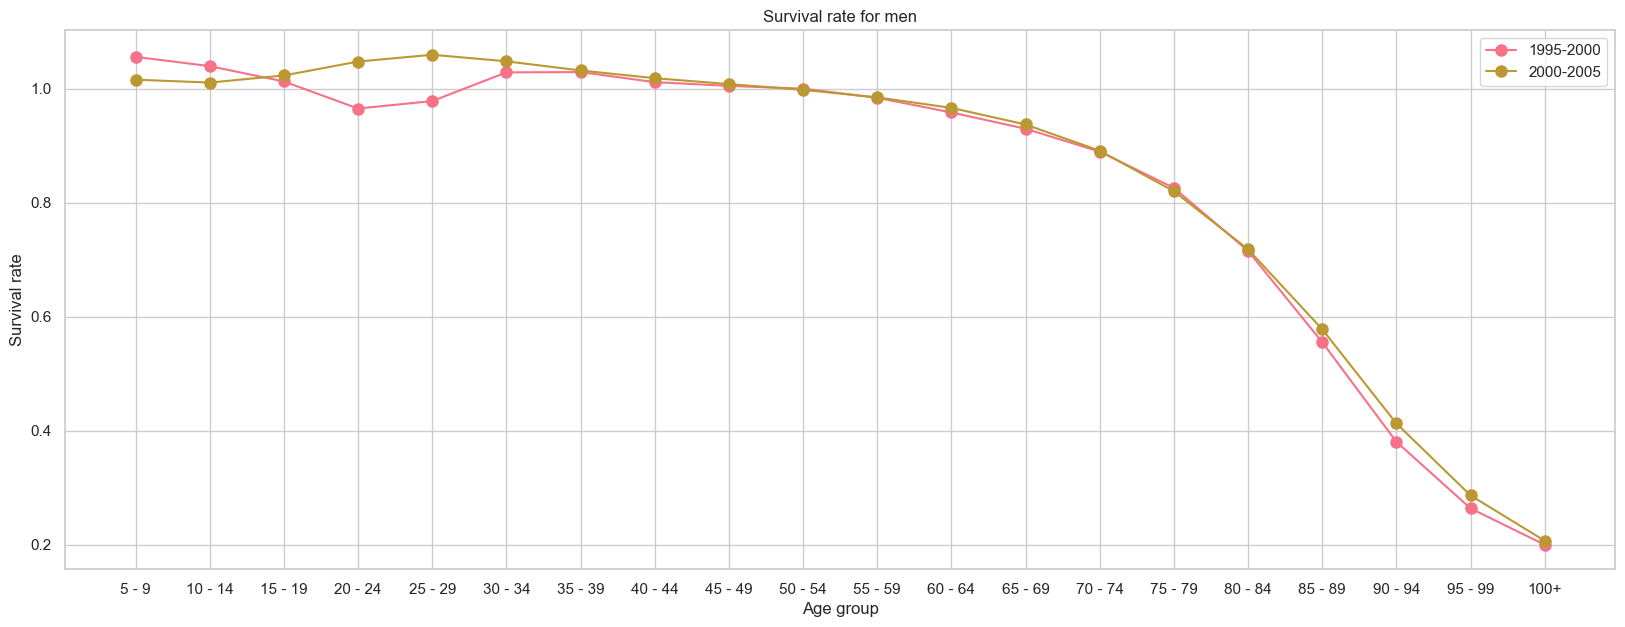

In [359]:
# Select the last two unique years from the index of the male dataset
# This will be a list like [2000, 2005] if those are the last two unique years
years_to_plot = male_1950_2005_estimates.index[-3:-1]

# Call the new function with the male dataset and the selected years
plot_survival_rates(male_1950_2005_estimates, years_to_plot, 'men')

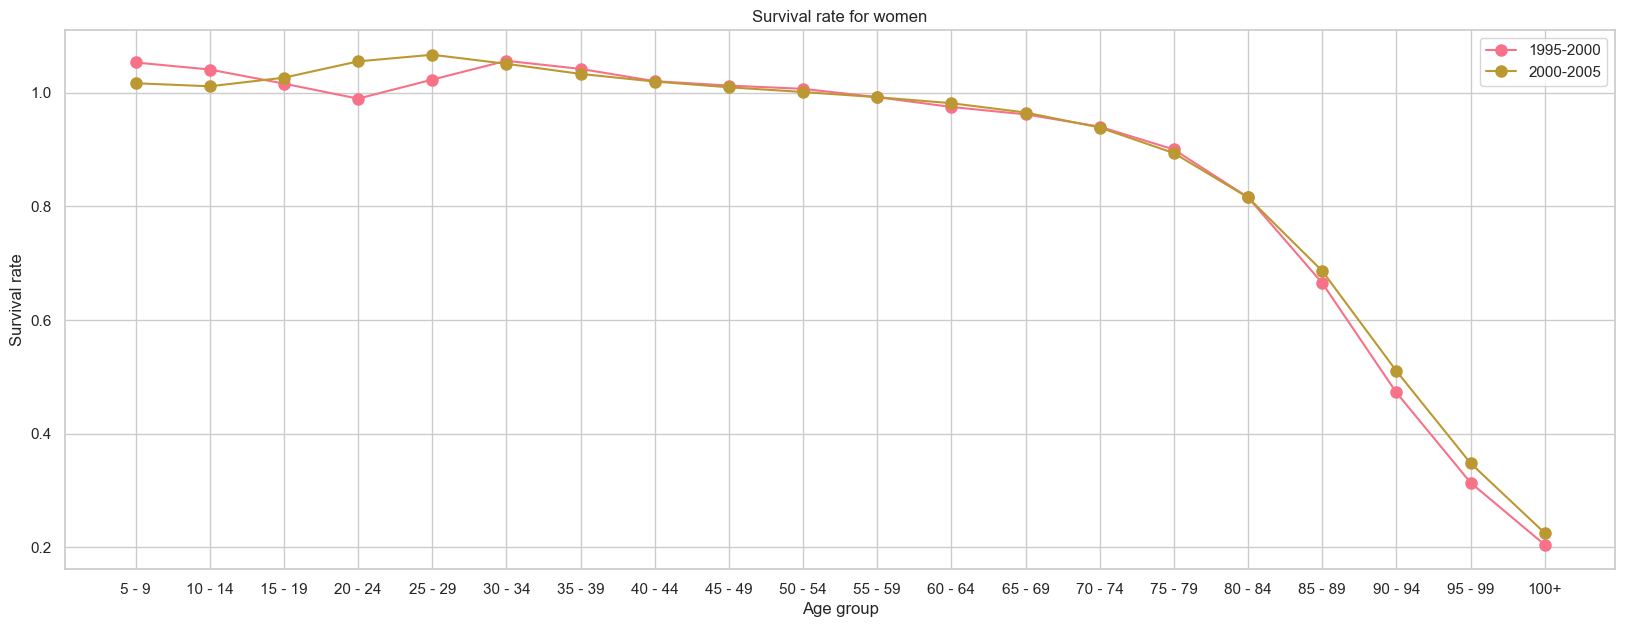

In [360]:
# Select the last two unique years from the index of the male dataset
# This will be a list like [2000, 2005] if those are the last two unique years
years_to_plot = female_1950_2005_estimates.index[-3:-1]

# Call the new function with the male dataset and the selected years
plot_survival_rates(female_1950_2005_estimates, years_to_plot, 'women')

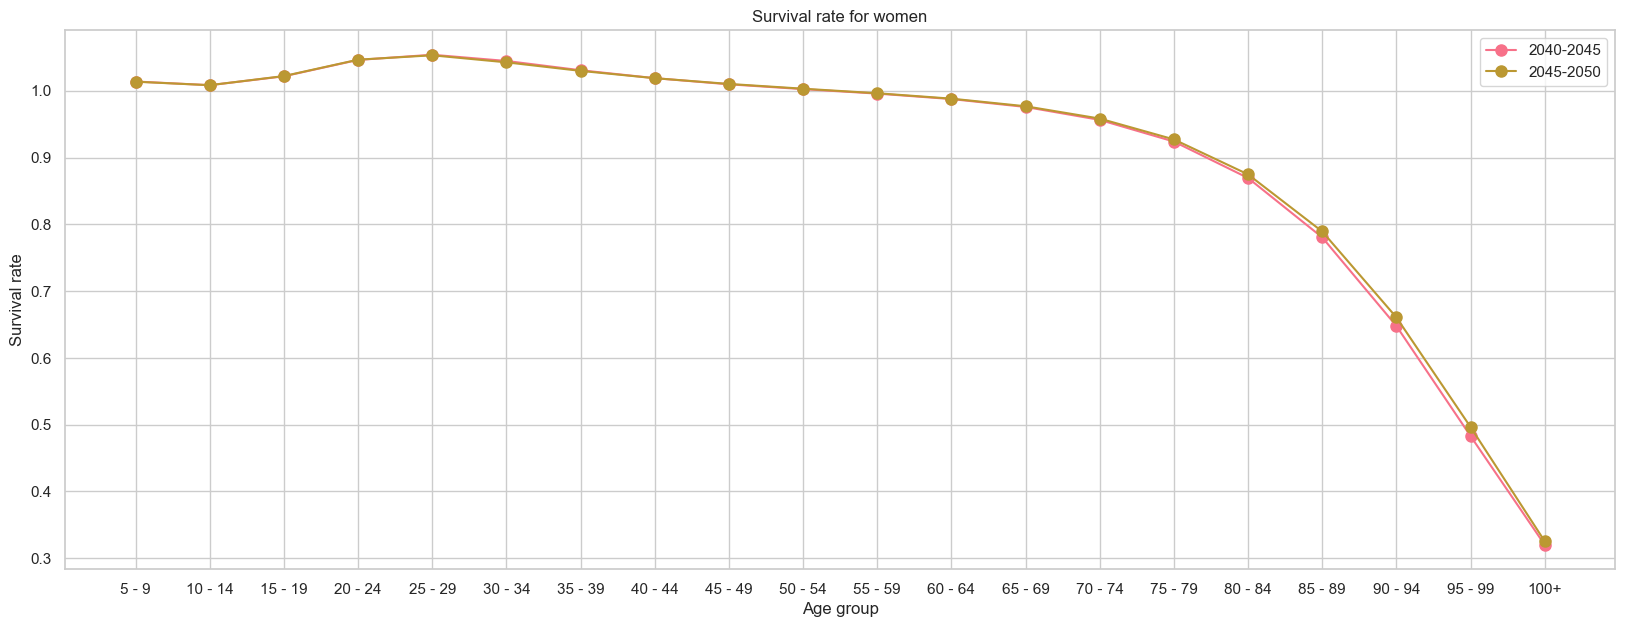

In [361]:
# Select the last two unique years from the index of the male dataset
# This will be a list like [2000, 2005] if those are the last two unique years
years_to_plot = female_2010_2050_medium_fertility.index[-3:-1]

# Call the new function with the male dataset and the selected years
plot_survival_rates(female_2010_2050_medium_fertility, years_to_plot, 'women')

Task 2

Determine the fertility rate for women in the age category “'20 - 24', '25 - 29', '30 - 34', '35 - 39'”

In [7]:
def get_fertility_rate(dataset_children, dataset_women, year, child_age_group, women_age_groups):
    """
    Calculate the fertility rate for a given year.

    Parameters:
    - dataset_children: DataFrame containing population data for children.
    - dataset_women: DataFrame containing population data for women.
    - year: The year to calculate the fertility rate for.
    - child_age_group: The age group to consider for children (usually '0 - 4').
    - women_age_groups: List of age groups to consider for women.
    
    Returns:
    The fertility rate for the given year, defined as the ratio of the number of children
    to the number of women in the given age groups.
    """
    
    children_population = dataset_children.loc[year, child_age_group]
    women_population = dataset_women.loc[year, women_age_groups].sum()
    
    return children_population / women_population


In [8]:
def get_fertility_rates(dataset_children, dataset_women, start_year, end_year, child_age_group, women_age_groups):
    fertility_rates = {}

    for year in range(start_year, end_year, 5):
        children_population = dataset_children.loc[year, child_age_group]
        women_population = dataset_women.loc[year, women_age_groups].sum()

        fertility_rate = children_population / women_population if women_population != 0 else np.nan
        fertility_rates[year] = fertility_rate

    return pd.Series(fertility_rates, name='fertility_rate')

In [9]:
fertility_rates = get_fertility_rates(both_1950_2005_estimates, female_1950_2005_estimates, 1950, 2010, '0 - 4', ['15 - 19', '20 - 24', '25 - 29', '30 - 34', '35 - 39', '40 - 44', '45 - 49'])
fertility_rates

1950    0.448594
1955    0.464512
1960    0.474853
1965    0.453801
1970    0.411390
1975    0.387202
1980    0.312804
1985    0.302430
1990    0.283223
1995    0.277150
2000    0.267396
2005    0.250215
Name: fertility_rate, dtype: float64

In [380]:
min(fertility_rates)

0.25021521729655616

In [381]:
max(fertility_rates)

0.47485262597929834

In [365]:
# Usage:
child_age_group = '0 - 4'
women_age_groups = ['15 - 19','20 - 24', '25 - 29', '30 - 34', '35 - 39']

get_fertility_rate(both_1950_2005_estimates, female_1950_2005_estimates, 2005, child_age_group, women_age_groups)

0.3572446699182366

In [366]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_fertility_rates(dataset_children, dataset_women, start_year, end_year, child_age_group, women_age_groups):
    """
    Plot the fertility rate over a range of years.

    Parameters:
    - dataset_children: DataFrame containing population data for children.
    - dataset_women: DataFrame containing population data for women.
    - start_year, end_year: The range of years to plot fertility rates for.
    - child_age_group: The age group to consider for children (usually '0 - 4').
    - women_age_groups: List of age groups to consider for women.
    """
    
    # Set up the seaborn style
    sns.set_style("whitegrid")
    sns.set_palette("husl")

    # Create a new figure with specified size
    plt.figure(figsize=(20,7))

    years = list(range(start_year, end_year + 1, 5))
    fertility_rates = []

    for year in years:
        fertility_rate = get_fertility_rate(dataset_children, dataset_women, year, child_age_group, women_age_groups)
        fertility_rates.append(fertility_rate)
    
    # Plot the fertility rates as a line on the figure
    plt.plot(years, fertility_rates, linestyle='-', marker='o', markersize=8)

    # Set the title of the figure
    plt.title(f'Fertility rate from {start_year} to {end_year}')
    
    # Set the label for the x-axis
    plt.xlabel('Year')

    # Set the label for the y-axis
    plt.ylabel('Fertility rate')

    # Show the figure
    plt.show()


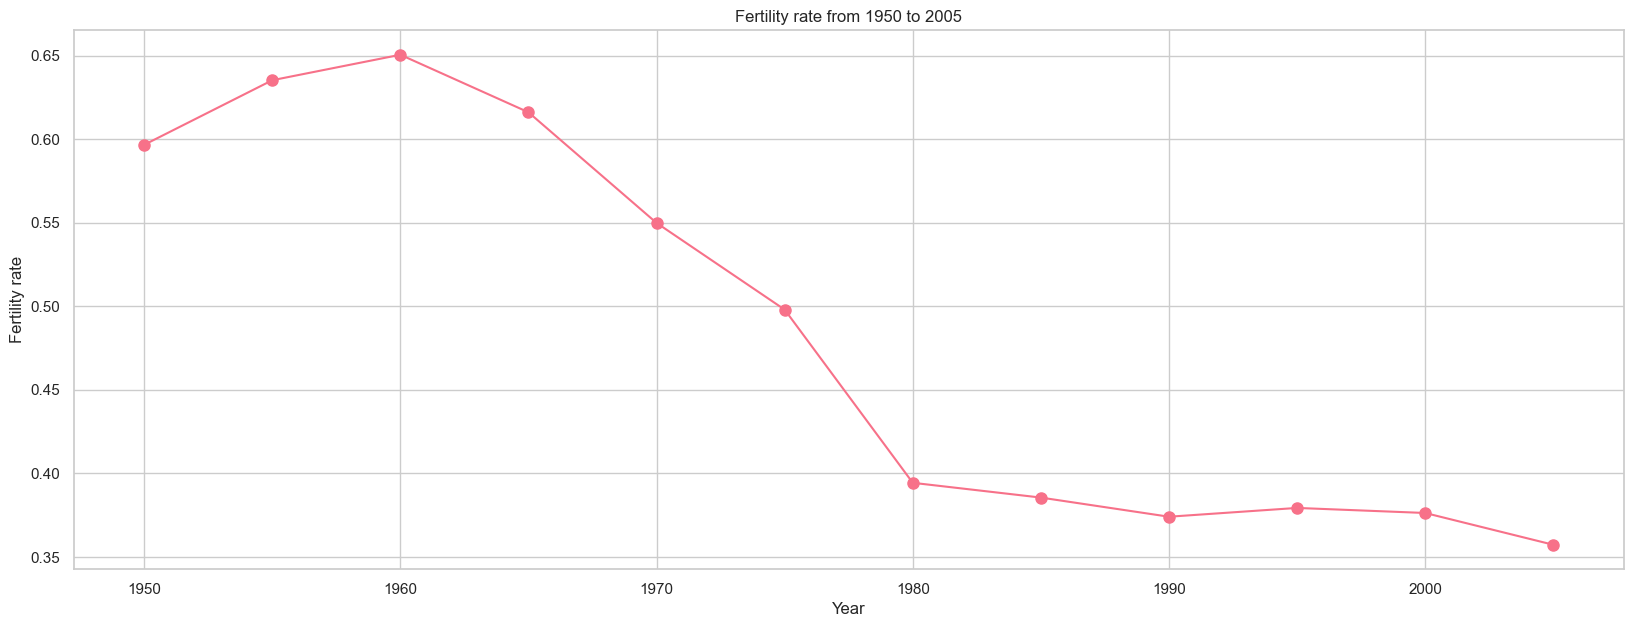

In [367]:
plot_fertility_rates(both_1950_2005_estimates, female_1950_2005_estimates, 1950, 2005, child_age_group, women_age_groups)


Task 3

Calculate boys/girls ratio for newborn children

Min and max boys/girls ratio
1.0456637623954914
1.0550396672931748


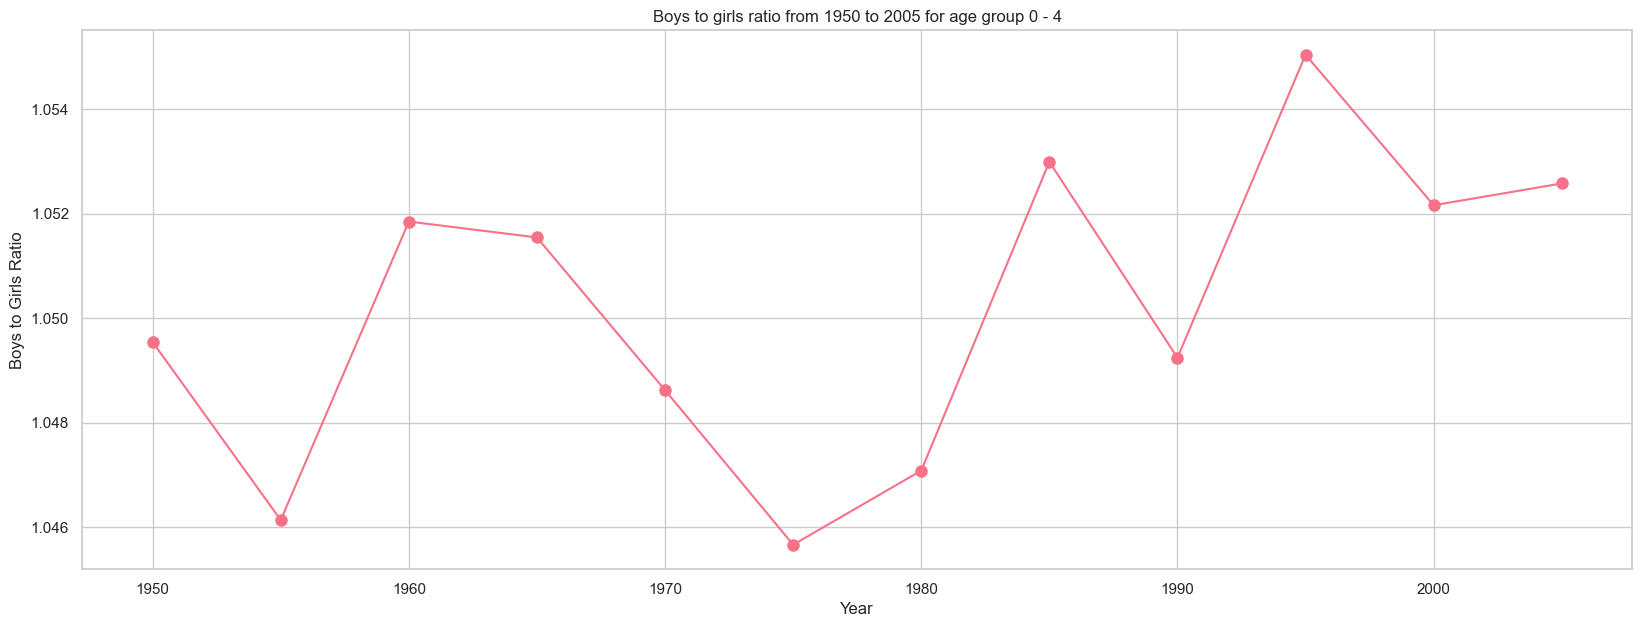

In [383]:
def plot_gender_ratio(dataset_men, dataset_women, start_year, end_year, age_group):
    """
    Plot the boys to girls ratio over a range of years.

    Parameters:
    - dataset_men: DataFrame containing population data for boys/men.
    - dataset_women: DataFrame containing population data for girls/women.
    - start_year, end_year: The range of years to plot gender ratios for.
    - age_group: The age group to consider (e.g., '0 - 4').
    """
    
    # Set up the seaborn style
    sns.set_style("whitegrid")
    sns.set_palette("husl")

    # Create a new figure with specified size
    plt.figure(figsize=(20,7))

    years = list(range(start_year, end_year + 1, 5))  # Adjust this line to account for 5-year intervals
    gender_ratios = []

    for year in years:
        boys = dataset_men.loc[year, age_group]
        girls = dataset_women.loc[year, age_group]
        ratio = boys / girls
        gender_ratios.append(ratio)

    print("Min and max boys/girls ratio")
    print(min(gender_ratios))
    print(max(gender_ratios))

    # Plot the gender ratios as a line on the figure
    plt.plot(years, gender_ratios, linestyle='-', marker='o', markersize=8)

    # Set the title of the figure
    plt.title(f'Boys to girls ratio from {start_year} to {end_year} for age group {age_group}')

    # Set the label for the x-axis
    plt.xlabel('Year')

    # Set the label for the y-axis
    plt.ylabel('Boys to Girls Ratio')

    # Show the figure
    plt.show()

# Call the function with appropriate arguments:
plot_gender_ratio(male_1950_2005_estimates, female_1950_2005_estimates, 1950, 2005, '0 - 4')


Task 4

Predict the change in the country's population and demographic profile for 100 years and compare with existing prediction!


In [10]:
category = both_1950_2005_estimates.columns

def get_boy_prob(year):
    return male_1950_2005_estimates.loc[year, category[0]] / both_1950_2005_estimates.loc[year, category[0]]

def get_girl_prob(year):
    return female_1950_2005_estimates.loc[year, category[0]] / both_1950_2005_estimates.loc[year, category[0]]

In [340]:
get_boy_prob(2005)

0.5127330281180665

In [370]:
# def generate_population_projection(age_groups, start_year, end_year, survival_rate, fertility, girl_probability, boy_probability, female_estimates, male_estimates, both_estimates, fertility_age_groups):
#     """
#     This function generates population projections based on the given parameters.

#     Parameters:
#     age_groups (list): Age groups to consider in the simulation.
#     start_year (int): Year to start the simulation.
#     end_year (int): Year to end the simulation.
#     survival_rate (float): The survival rate used for simulation.
#     fertility (float): The fertility rate used for simulation.
#     girl_probability (float): The probability of a newborn being a girl.
#     boy_probability (float): The probability of a newborn being a boy.
#     female_estimates (pd.DataFrame): The initial population estimates for females.
#     male_estimates (pd.DataFrame): The initial population estimates for males.
#     both_estimates (pd.DataFrame): The initial population estimates for both genders.
#     fertility_age_groups (list): Age groups that can contribute to fertility.

#     Returns:
#     population_projections (pd.DataFrame): A DataFrame containing the population projections for each age group and each year.
#     """
    
#     # Create a list of years for which the simulation will run
#     years = list(range(start_year, end_year+1, 5))

#     # Initialize the DataFrame for storing the population projections
#     population_projections = pd.DataFrame(index=range(start_year, end_year+1, 5), columns=age_groups)
    
#     # Populate the projections for the start year with initial population estimates
#     population_projections.loc[start_year] = both_estimates.loc[start_year]
    
#     # For each year in the simulation...
#     for i in range(len(years) -1):
#         # Compute the female newborns based on fertility rate, relevant age group population, and girl probability
#         f_0 = female_estimates.loc[years[i+1],age_groups[0]] = fertility * female_estimates.loc[years[i], fertility_age_groups].sum() * girl_probability
#         # Compute the remaining female population based on survival rate and previous year's population
#         f_1 = female_estimates.loc[years[i+1],age_groups[1:]] = survival_rate * female_estimates.loc[years[i]].shift(periods = 1)
#         # Compute the male newborns based on fertility rate, relevant age group population, and boy probability
#         m_0 = male_estimates.loc[years[i+1],age_groups[0]] = fertility * male_estimates.loc[years[i], fertility_age_groups].sum() * boy_probability
#         # Compute the remaining male population based on survival rate and previous year's population
#         m_1 = male_estimates.loc[years[i+1],age_groups[1:]] = survival_rate * male_estimates.loc[years[i]].shift(periods = 1)
        
#         # Update the population projections with the computed values for newborns and remaining population
#         population_projections.loc[years[i+1],age_groups[0]] = f_0 + m_0
#         population_projections.loc[years[i+1],age_groups[1:]] = f_1 + m_1

#     # Return the final population projections
#     return population_projections


In [11]:
def generate_population_projection(fertility, boy_probability, survival_rate, forecast_years):
    """
    This function generates population projections based on the given parameters.

    Parameters:
    survival_rate (float): The survival rate used for simulation.
    fertility (float): The fertility rate used for simulation.
    boy_probability (float): The probability of a newborn being a boy.
    forecast_years (list): The years for which to generate forecasts.

    Returns:
    population_projections (pd.DataFrame): A DataFrame containing the population projections for each age group and each year.
    """

    # Year to start the simulation
    start_year = 2005

    # Year to end the simulation
    end_year = max(forecast_years)

    # Age groups to consider in the simulation
    age_groups = ['0 - 4', '5 - 9', '10 - 14', '15 - 19', '20 - 24', '25 - 29', '30 - 34', '35 - 39', '40 - 44', '45 - 49', 
                '50 - 54', '55 - 59', '60 - 64', '65 - 69', '70 - 74', '75 - 79', '80 - 84', '85 - 89', '90 - 94', '95 - 99', '100+']
    
    # Age groups that can contribute to fertility
    fertility_age_groups = ['15 - 19','20 - 24', '25 - 29', '30 - 34', '35 - 39']
    
    girl_probability = 1 - boy_probability

    # The initial population estimates for females
    female_estimates = female_1950_2005_estimates.copy()

    # The initial population estimates for males
    male_estimates = male_1950_2005_estimates.copy()

    # The initial population estimates for both genders
    both_estimates = both_1950_2005_estimates.copy()
    
    # Create a list of years for which the simulation will run
    years = list(range(start_year, end_year+1, 5))

    # Initialize the DataFrame for storing the population projections
    population_projections = pd.DataFrame(index=range(start_year, end_year+1, 5), columns=age_groups)
    
    # Populate the projections for the start year with initial population estimates
    population_projections.loc[start_year] = both_estimates.loc[start_year]
    
    # For each year in the simulation...
    for i in range(len(years) -1):
        # Only compute forecasts for the specified years
        if years[i+1] in forecast_years:
            # Compute the female newborns based on fertility rate, relevant age group population, and girl probability
            f_0 = female_estimates.loc[years[i+1],age_groups[0]] = fertility * female_estimates.loc[years[i], fertility_age_groups].sum() * girl_probability
            # Compute the remaining female population based on survival rate and previous year's population
            f_1 = female_estimates.loc[years[i+1],age_groups[1:]] = survival_rate * female_estimates.loc[years[i]].shift(periods = 1)
            # Compute the male newborns based on fertility rate, relevant age group population, and boy probability
            m_0 = male_estimates.loc[years[i+1],age_groups[0]] = fertility * male_estimates.loc[years[i], fertility_age_groups].sum() * boy_probability
            # Compute the remaining male population based on survival rate and previous year's population
            m_1 = male_estimates.loc[years[i+1],age_groups[1:]] = survival_rate * male_estimates.loc[years[i]].shift(periods = 1)
            
            # Update the population projections with the computed values for newborns and remaining population
            population_projections.loc[years[i+1],age_groups[0]] = f_0 + m_0
            population_projections.loc[years[i+1],age_groups[1:]] = f_1 + m_1

    # Filter the final DataFrame to only include the forecast years
    population_projections = population_projections.loc[forecast_years]
    
    # Return the final population projections
    return population_projections


In [26]:
# Model's parameters

# The survival rate used for simulation. Here, it is fetched from another function `get_survival_rate`
survival_rate = get_survival_rate(both_1950_2005_estimates, 2000, 2005).loc[2005]

fertility_rate = get_fertility_rate(both_1950_2005_estimates, female_1950_2005_estimates, 2005, '0 - 4', ['15 - 19', '20 - 24', '25 - 29', '30 - 34', '35 - 39'])

# The probability of a newborn being a boy, fetched from another function `get_boy_prob`
boys_ratio = get_boy_prob(2005)

# forecast_years = [2005, 2010, 2015, 2020, 2025, 2030, 2035, 2040, 2045, 2050]

# forecast_years = [2005, 2010, 2015]

forecast_years = [2005, 2010, 2015, 2020, 2025, 2030, 2035, 2040, 2045, 2050, 2055, 2060, 2065, 2070, 2075, 2080, 2085, 2090, 2095, 2100, 2105]


# Model's Execution

# Call the `generate_population_projection` function to run the simulation 
# The function uses the parameters defined above to simulate the population projections
population_projections = generate_population_projection(
    fertility = fertility_rate,
    boy_probability = boys_ratio,
    survival_rate = survival_rate,
    forecast_years = forecast_years,
)

In [27]:
population_projections

,0 - 4,5 - 9,10 - 14,15 - 19,20 - 24,25 - 29,30 - 34,35 - 39,40 - 44,45 - 49,...,55 - 59,60 - 64,65 - 69,70 - 74,75 - 79,80 - 84,85 - 89,90 - 94,95 - 99,100+
2005,1527.097,1599.687,1688.819,1715.322,1686.743,1623.45,1719.628,1799.881,1822.688,1759.714,...,1463.548,1114.879,880.007,723.539,633.739,457.353,240.393,93.34,22.118,3.423
2010,1526.312547,1552.274975,1617.702997,1731.080726,1803.741244,1793.70456,1704.188532,1775.993879,1834.607622,1839.185879,...,1589.898968,1425.68835,1060.731498,805.880055,621.825686,490.395597,295.062611,115.084051,30.96122,4.89335
2015,1573.860524,1551.477588,1569.757008,1658.185085,1820.31228,1918.122023,1882.910309,1760.048336,1810.259627,1851.213391,...,1739.54274,1548.77082,1356.445443,971.381317,692.59144,481.176917,316.380138,141.256195,38.173801,6.84981
2020,1615.488236,1599.809511,1568.950641,1609.039275,1743.659108,1935.743879,2013.515386,1944.628247,1794.006433,1826.645012,...,1818.103649,1694.543546,1473.550038,1242.185947,834.826946,535.936391,310.43268,151.461598,46.855197,8.445509
2025,1652.66243,1642.123559,1617.826888,1608.21273,1691.979992,1854.229894,2032.013625,2079.51429,1982.147599,1810.244704,...,1829.993291,1771.07221,1612.242867,1349.426296,1067.562534,646.000102,345.760913,148.614354,50.240366,10.366167
2030,1656.17315,1679.910661,1660.617485,1658.312077,1691.110841,1799.273646,1946.44573,2098.618864,2119.636114,2000.088811,...,1805.706535,1782.654286,1685.054682,1476.436405,1159.727301,826.09397,416.768834,165.527143,49.295925,11.115097
2035,1643.380971,1683.479265,1698.830153,1702.173484,1743.792645,1798.349379,1888.75636,2010.246228,2139.109288,2138.821789,...,1789.494221,1758.995789,1696.07424,1543.114953,1268.882644,897.412282,532.956914,199.520975,54.905959,10.90615
2040,1634.501389,1670.476174,1702.438947,1741.342402,1789.914965,1854.371899,1887.786127,1950.66592,2049.031604,2158.471223,...,1977.162182,1743.202862,1673.56479,1553.206284,1326.187688,981.878126,578.96813,255.144037,66.181837,12.147305
2045,1649.146541,1661.450191,1689.289413,1745.041504,1831.102913,1903.418976,1946.594797,1949.663884,1988.301763,2067.57821,...,2114.304891,1926.016153,1658.538894,1532.592906,1334.860405,1026.221525,633.461513,277.171122,84.632211,14.641962
2050,1676.493822,1676.336805,1680.161777,1731.562911,1834.992692,1947.218779,1998.081118,2010.400182,1987.280394,2006.298679,...,2133.729086,2059.611198,1832.473299,1518.832709,1317.144804,1032.932587,662.069786,303.258901,91.938675,18.723892


In [19]:
def plot_comparison(year):
    plt.figure(figsize = (20,7))
    plt.plot(population_projections.loc[year], label = 'Predict by me')
    plt.plot(both_2010_2050_medium_fertility.loc[year], label = 'Predict by UN')
    plt.legend()
    plt.title('Comparison my and UN forecast')
    plt.show();

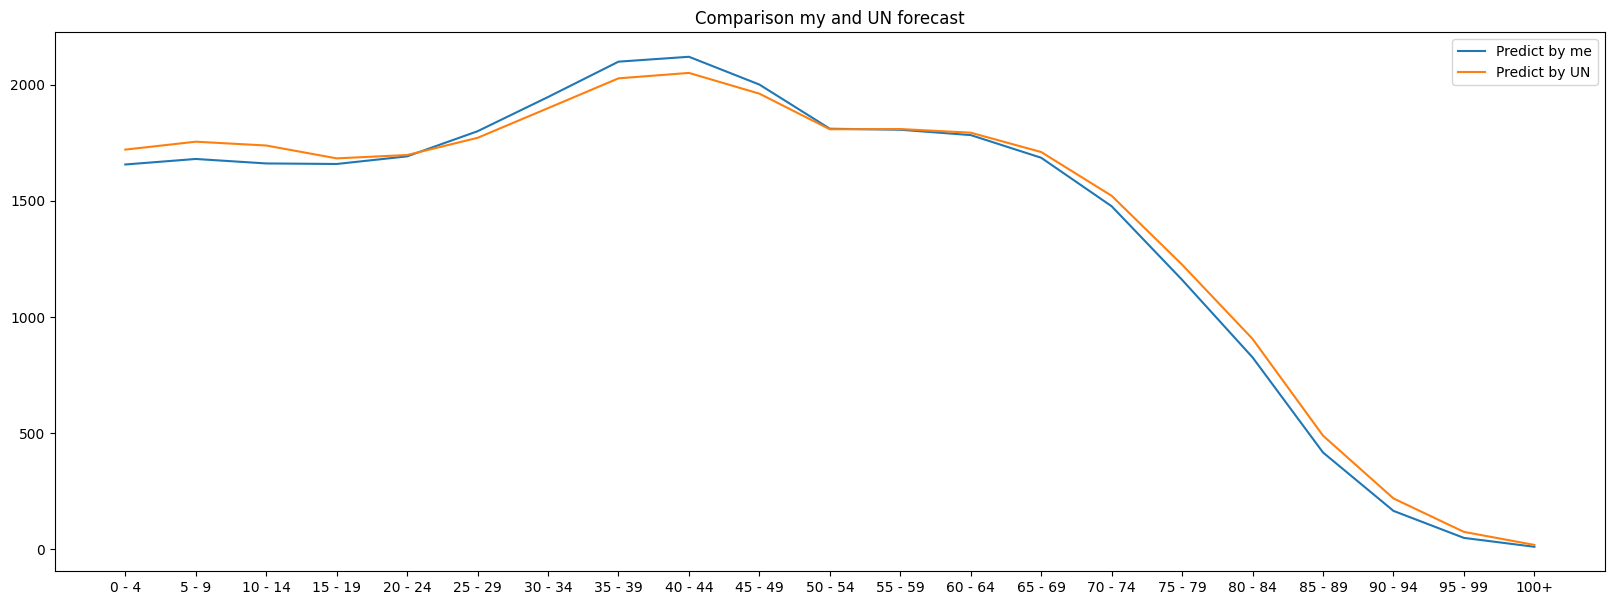

In [20]:
plot_comparison(2030)

# A timeseries for population vs time-period

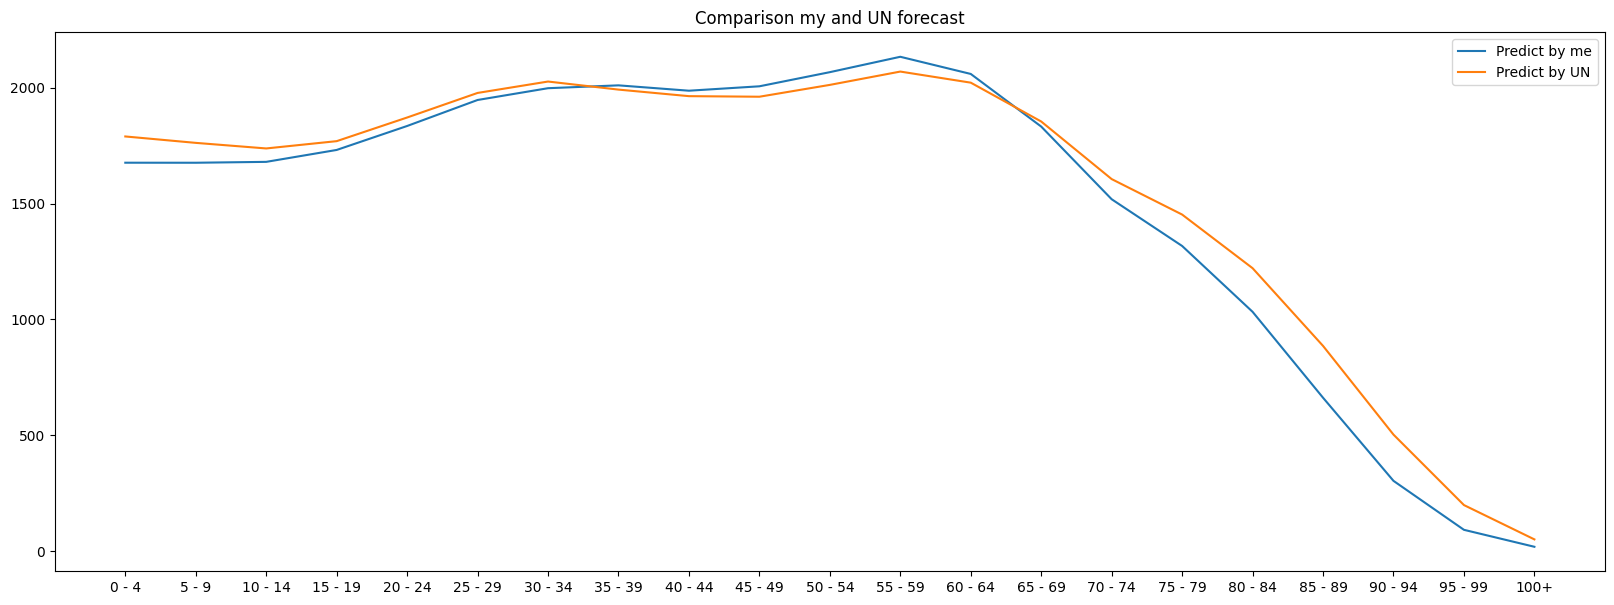

In [21]:
plot_comparison(2050)

Sensitivity Analysis (TASK 2)

In [314]:
!pip3 install salib

# Conclusion

1. Survival Rates for men and women starts to take a sharp decline from 75+ agegroups
2. Fertility rates seems to have been controlled to an average below 0.40 from the 1980s
3. Boys to girls ratio variation is quite minimal between 1.04 to 1.05
4. Overall in predictions, we see that all age groups population increases over time

